In [22]:
sos_lyrics = '''
Where are those happy days, they seem so hard to find
I tried to reach for you, but you have closed your mind
Whatever happened to our love?
I wish I understood
It used to be so nice, it used to be so good
So when you're near me, darling can't you hear me
S.O.S.
The love you gave me, nothing else can save me
S.O.S.
When you're gone
How can I even try to go on?
When you're gone
Though I try how can I carry on?
You seem so far away though you are standing near
You made me feel alive, but something died I fear
I really tried to make it out
I wish I understood
What happened to our love, it used to be so good
So when you're near me, darling can't you hear me
S.O.S.
The love you gave me, nothing else can save me
S.O.S.
When you're gone
How can I even try to go on?
When you're gone
Though I try how can I carry on?
So when you're near me, darling can't you hear me
S.O.S.
And the love you gave me, nothing else can save me
S.O.S.
When you're gone
How can I even try to go on?
When you're gone
Though I try how can I carry on?
When you're gone
How can I even try to go on?
When you're gone
Though I try how can I carry on?
'''

In [17]:
only_letters = lambda x: str(filter(lambda y: y.isalpha(), x))
tolower = lambda x: x.lower()

In [25]:
words = sos_lyrics.replace('\n', ' ').split()
words = map(lambda x: filter(only_letters, x), words)
words = map(tolower, words)

In [26]:
from collections import Counter
word_counts = Counter(words)

In [45]:
import nltk
nltk_webtext = dict(Counter(nltk.corpus.webtext.words()))

In [54]:
rel_freqs = {}
nltk_webtext = {filter(only_letters, x.encode('ascii', errors='ignore')).lower(): nltk_webtext[x] for x in nltk_webtext}

In [83]:
nltk_sum = sum(nltk_webtext.values())
print(nltk_sum)
for key in word_counts:
    if key in nltk_webtext:
        rel_freqs[key] = float(nltk_webtext[key]) / nltk_sum
        print(rel_freqs[key])
    else:
        rel_freqs[key] = 0.000000001

131800
7.58725341426e-05
0.000303490136571
6.82852807284e-05
7.58725341426e-06
1.51745068285e-05
7.58725341426e-05
8.34597875569e-05
0.0197647951442
0.000326251896813
0.000333839150228
3.03490136571e-05
6.82852807284e-05
0.00370257966616
0.00539453717754
2.27617602428e-05
0.00056904400607
2.27617602428e-05
0.000493171471927
0.000629742033384
0.000326251896813
1.51745068285e-05
0.000614567526555
0.00204855842185
1.51745068285e-05
0.000485584218513
0.00040971168437
0.00128224582701
0.00104704097117
0.00157056145675
0.000121396054628
7.58725341426e-06
4.55235204856e-05
0.000303490136571
0.000523520485584
0.00985584218513
0.000637329286798
0.000280728376328
9.86342943854e-05
0.00101669195751
0.000303490136571
0.000614567526555
7.58725341426e-06
0.0001062215478
0.00233687405159
0.000447647951442
0.000599393019727
8.34597875569e-05
0.00474962063733
0.000144157814871
1.51745068285e-05
0.00106980273141
0.00990136570561
0.0244916540212
0.000910470409712
1.51745068285e-05
0.000386949924127
2.276

1.46288210304e-15
245.848712149


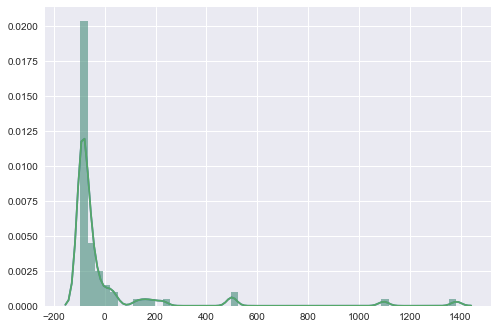

In [81]:
import numpy as np
devs = np.std(np.array(rel_freqs.values()))
mean = np.mean(np.array(rel_freqs.values()))
print(mean)
print(devs)
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(rel_freqs.values())
plt.show()

In [84]:
for key in rel_freqs:
    rel_freqs[key] = (rel_freqs[key] - mean) / devs

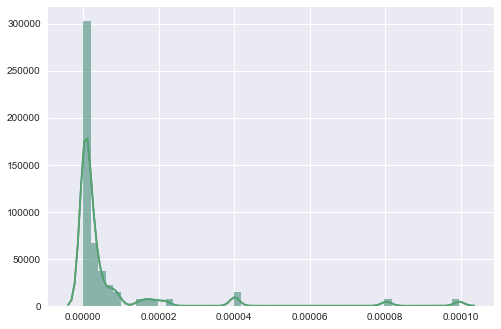

In [87]:
rel_freqs
sns.distplot(rel_freqs.values())
plt.show()

In [88]:
importance = {}
for key in word_counts:
    importance[key] = word_counts[key] / rel_freqs[key]

In [95]:
importance_vals = importance.values()
min_val = min(importance_vals)
max_val = max(importance_vals)
for key in importance:
    importance[key] = ((importance[key] - min_val) / (max_val - min_val)) * 100000

In [96]:
importance

{'alive': 0.10724025826842219,
 'and': 0.11813280450132188,
 'are': 0.7971015197094361,
 'away': 0.0069972603297615071,
 'be': 0.27481789261674805,
 'but': 0.006095186107601144,
 'can': 0.051891954239630562,
 'cant': 0.39770815780836843,
 'carry': 0.29785981733885025,
 'closed': 0.01567972471802152,
 'darling': 1.7955849244770778,
 'days': 0.39770815782548097,
 'died': 0.028269298081041627,
 'else': 0.059239207072649895,
 'even': 0.016065612024128938,
 'far': 1.1964948817474035,
 'fear': 1.1964948817474035,
 'feel': 0.59740483878670991,
 'find': 1.1964948817474035,
 'for': 0.020503316044843119,
 'gave': 1.1964948815933913,
 'go': 0.072048955054043504,
 'gone': 0.23795081305765264,
 'good': 0.00322537006273614,
 'happened': 0.052777527104258003,
 'happy': 0.030698041497771784,
 'hard': 0.11813280450132188,
 'have': 0.014290530415898289,
 'hear': 0.043815305520428928,
 'how': 0.05503337987412818,
 'i': 11.381025610000025,
 'it': 0.00015461181189036394,
 'love': 0.66397039905293032,
 'mad